# 1. 결정 트리 훈련

1-a . make_moons (n_sample=1000, noise=0.4)를 사용해 데이터셋을 생성합니다.

In [1]:
from sklearn.datasets import make_moons

X,y = make_moons(n_samples=1000, noise=0.4, random_state=42)

1-b. 이를 train_test_split( )을 사용해 훈련 세트와 테스트 세트로 나눕니다.(random_state=42, train:test = 8:2 비율로)


In [3]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

1-c. DecisionTreeClassifier의 최적의 매개변수를 찾기 위해 교차 검증과 함께 그리드 탐색을 수행합니다. (GridSearchCV) 

힌트 : 여러가지 max_leaf_nodes 값을 시도해보세요! (교재 pg. 113, 207 참고)

In [5]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV


tree_clf = DecisionTreeClassifier(random_state=42)

params = {'max_leaf_nodes' : list(range(2,100)),'min_samples_split' : [2,3,4]}

grid_search_cv = GridSearchCV(tree_clf,param_grid=params,cv=3,n_jobs=-1,verbose=1)

grid_search_cv.fit(X_train,y_train)
# 예시 파라미터: params = {'max_leaf_nodes' : list(range(2,100)),'min_samples_split' : [2,3,4]}

Fitting 3 folds for each of 294 candidates, totalling 882 fits


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_leaf_nodes': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                            13, 14, 15, 16, 17, 18, 19, 20, 21,
                                            22, 23, 24, 25, 26, 27, 28, 29, 30,
                                            31, ...],
                         'min_samples_split': [2, 3, 4]},
             verbose=1)

In [6]:
# 최적의 매개변수 확인
grid_search_cv.best_estimator_

DecisionTreeClassifier(max_leaf_nodes=4, random_state=42)

1-d. 찾은 매개변수를 사용해 전체 훈련 세트에 대해 모델을 훈련시키고 테스트 세트에서 성능(정확도)을 측정합니다. (대략 85~87% 정도 나옵니다.)

In [7]:
from sklearn.metrics import accuracy_score
y_pred = grid_search_cv.best_estimator_.predict(X_test)
accuracy_score(y_test,y_pred)

# GridSearchCV는 최적의 모델로 다시 훈련시키기 때문에 별도의 훈련이 필요없습니다.

0.855

# 2. 랜덤포레스트

In [8]:
# 데이터 다운로드 링크로 데이터를 코랩에 불러옵니다.

!wget 'https://bit.ly/3i4n1QB'

import zipfile
with zipfile.ZipFile('3i4n1QB', 'r') as existing_zip:
    existing_zip.extractall('data')

'https://bit.ly/3i4n1QB': Scheme missing.


In [9]:
# 라이브러리 불러오기

import pandas as pd
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier

In [10]:
train = pd.read_csv("C:/Users/MYCOM/train.csv")

# Scaling
scaler = MinMaxScaler()
scaler.fit(train[['fixed acidity']])
train['Scaled fixed acidity'] = scaler.transform(train[['fixed acidity']])

# Encoding
encoder = OneHotEncoder()
encoder.fit(train[['type']])
onehot = encoder.transform(train[['type']])
onehot = onehot.toarray()
onehot = pd.DataFrame(onehot)
onehot.columns = encoder.get_feature_names()
train = pd.concat([train, onehot], axis = 1)
train = train.drop(columns = ['type'])
train.head()

C:\Users\MYCOM\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,index,quality,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,Scaled fixed acidity,x0_red,x0_white
0,0,5,5.6,0.695,0.06,6.8,0.042,9.0,84.0,0.99432,3.44,0.44,10.2,0.148760,0.0,1.0
1,1,5,8.8,0.610,0.14,2.4,0.067,10.0,42.0,0.99690,3.19,0.59,9.5,0.413223,1.0,0.0
2,2,5,7.9,0.210,0.39,2.0,0.057,21.0,138.0,0.99176,3.05,0.52,10.9,0.338843,0.0,1.0
3,3,6,7.0,0.210,0.31,6.0,0.046,29.0,108.0,0.99390,3.26,0.50,10.8,0.264463,0.0,1.0
4,4,6,7.8,0.400,0.26,9.5,0.059,32.0,178.0,0.99550,3.04,0.43,10.9,0.330579,0.0,1.0


2-a. 랜덤포레스트 분류 모형을 불러옵니다.

In [11]:
from sklearn.ensemble import RandomForestClassifier

2-b. 랜덤포레스트 분류 모형을 "random_classifier"라는 변수에 저장합니다.

In [37]:
random_classifier = RandomForestClassifier()

2-c. "X"라는 변수에 train의 "quality" 피쳐를 제거하고 저장합니다.

In [21]:
X = train.drop(columns = ['quality'])

2-d. "y"라는 변수에 정답인 train의 "quality" 피쳐를 저장합니다.

In [22]:
y = train['quality']

2-e. "random_classifier"를 X와 y를 이용해 학습시켜보세요.

In [38]:
rf=random_classifier.fit(X,y)
pred=rf.predict(X)
accuracy=accuracy_score(y,pred)
print('랜덤 포레스트 정확도:{0:.4f}'.format(accuracy))

랜덤 포레스트 정확도:1.0000


In [36]:
# test,train 용 나눠서 랜덤 포레스트 학습하기

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
rf1=random_classifier.fit(X_train,y_train)
pred=rf1.predict(X_test)
accuracy=accuracy_score(y_test,pred)
print('랜덤 포레스트 정확도:{0:.4f}'.format(accuracy))

랜덤 포레스트 정확도:0.6755


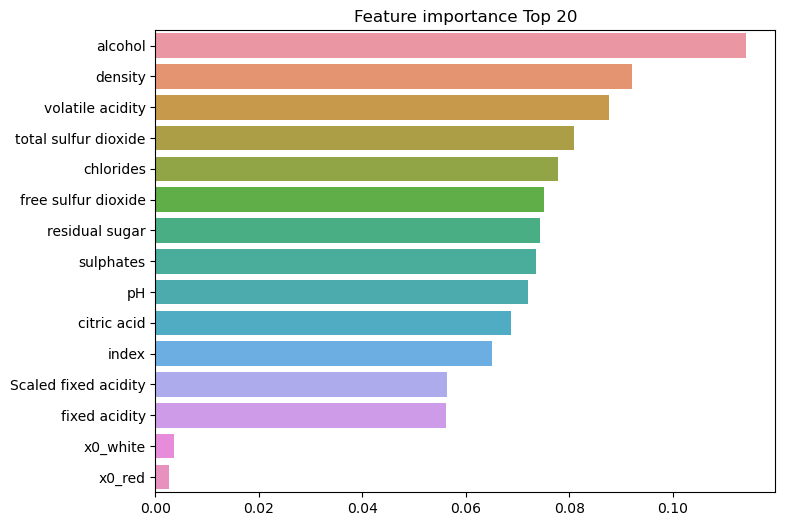

In [35]:
# 피처 중요도 시각화하기

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

ftr_importances_values=rf1.feature_importances_
ftr_importances=pd.Series(ftr_importances_values,index=X_train.columns)
ftr_top20=ftr_importances.sort_values(ascending=False)[:20]

plt.figure(figsize=(8,6))
plt.title('Feature importance Top 20')
sns.barplot(x=ftr_top20,y=ftr_top20.index)
plt.show()